Libraries imported successfully!
Dataset Shape: (1148, 14)

First few rows:
      Company                           Item Calories Calories from\nFat  \
0  McDonald’s                      Hamburger      250                 80   
1  McDonald’s                   Cheeseburger      300                110   
2  McDonald’s            Double Cheeseburger      440                210   
3  McDonald’s                       McDouble      390                170   
4  McDonald’s   Quarter Pounder® with Cheese      510                230   

  Total Fat\n(g) Saturated Fat\n(g) Trans Fat\n(g) Cholesterol\n(mg)  \
0              9                3.5            0.5                25   
1             12                  6            0.5                40   
2             23                 11            1.5                80   
3             19                  8              1                65   
4             26                 12            1.5                90   

  Sodium \n(mg) Carbs\n(g) Fiber\n

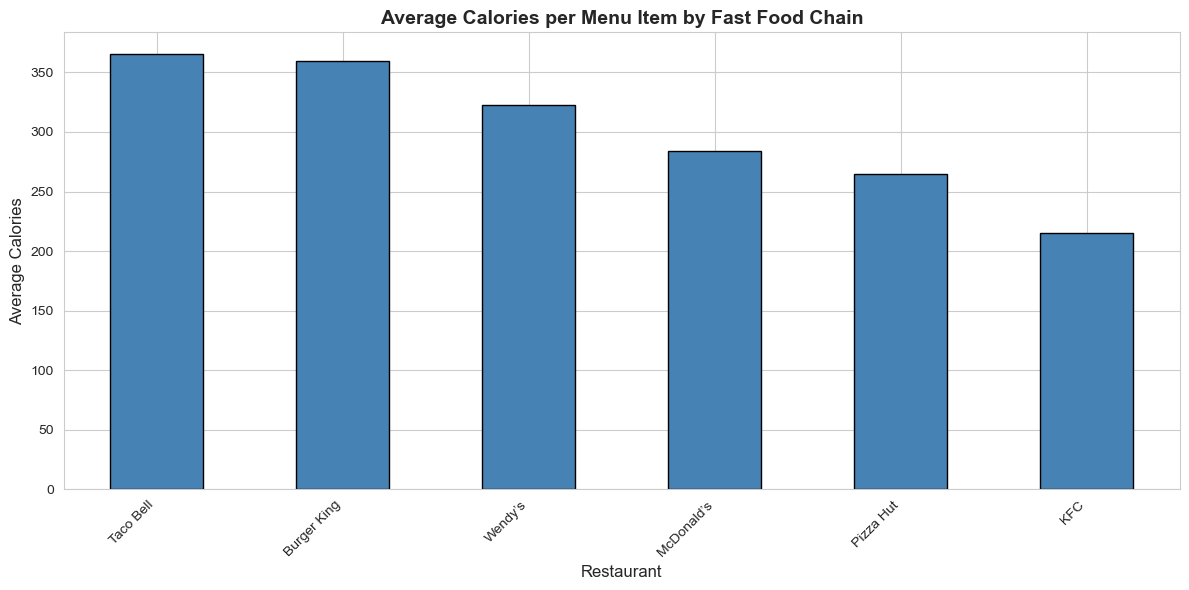


Highest: Taco Bell with 365.4 calories
Lowest: KFC with 215.2 calories

QUESTION 2: Relationship between Calories and Sodium/Sugar

Correlation Matrix:
             Calories  Sodium (mg)  Sugars (g)
Calories     1.000000     0.731391    0.251987
Sodium (mg)  0.731391     1.000000   -0.310883
Sugars (g)   0.251987    -0.310883    1.000000


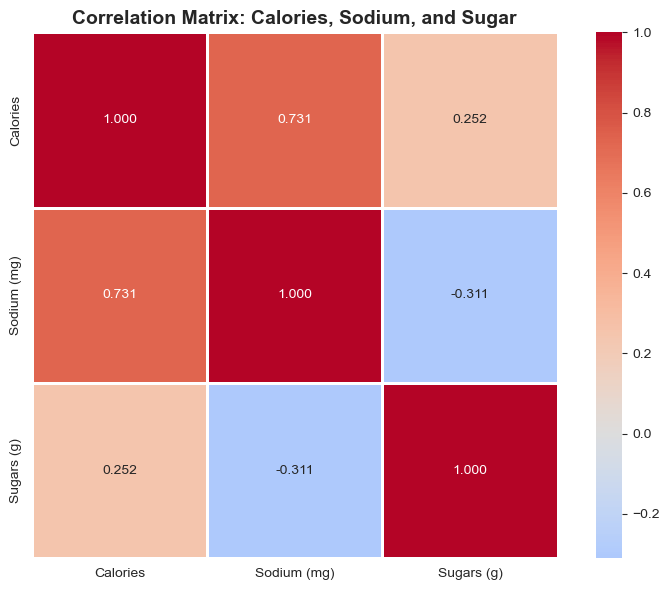

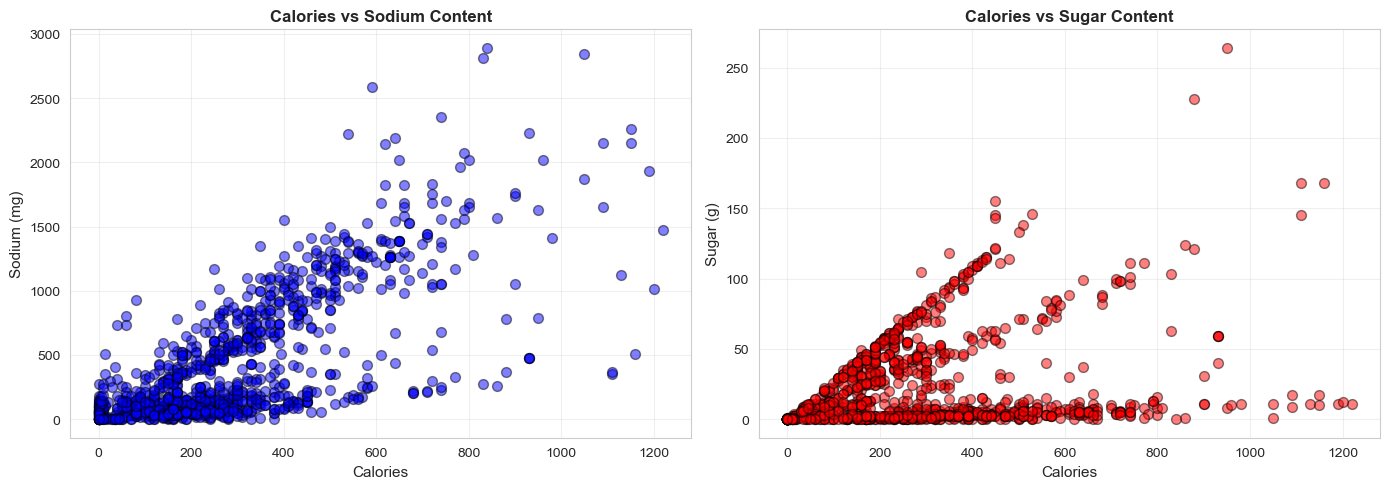


Correlation between Calories and Sodium: 0.731
Correlation between Calories and Sugar: 0.252

QUESTION 3: Predicting Calorie Content with Regression

Features shape: (1062, 3)
Target shape: (1062,)

Training set size: 849
Test set size: 213

--------------------------------------------------
MODEL PERFORMANCE
--------------------------------------------------
Training R²: 0.9967
Test R²: 0.9978
Training RMSE: 12.73 calories
Test RMSE: 10.90 calories
Test MAE: 7.02 calories

--------------------------------------------------
MODEL COEFFICIENTS
--------------------------------------------------
Intercept: -0.19
Protein (g): 4.03
Total Fat (g): 9.28
Carbs (g): 3.79

Interpretation:
- Each gram of protein adds ~4.03 calories
- Each gram of fat adds ~9.28 calories
- Each gram of carbs adds ~3.79 calories


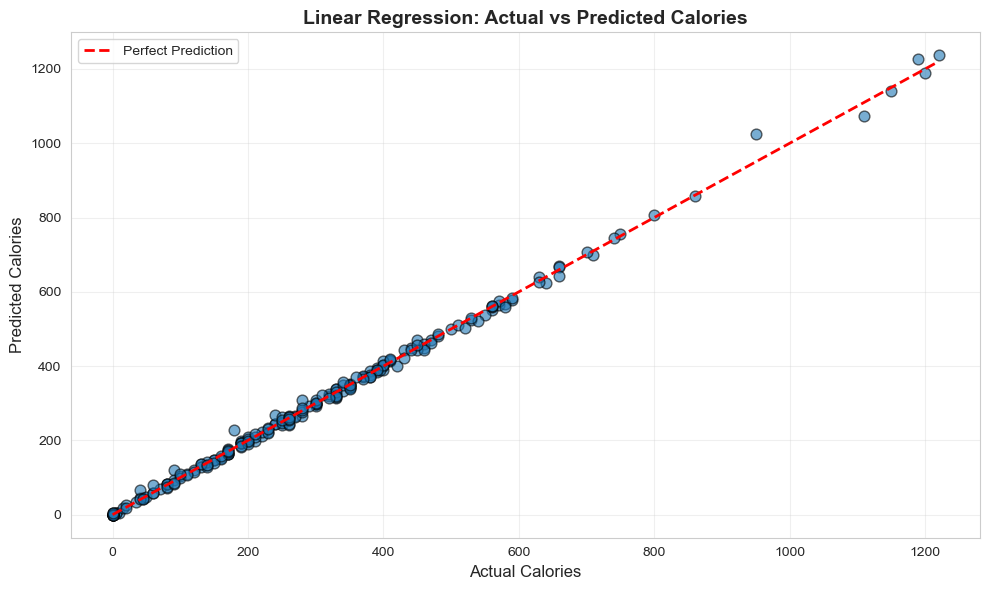


QUESTION 4: Healthiest Fast Food Chain

Health Score by Restaurant (higher = healthier):

Company
KFC            0.889291
Pizza Hut      0.863405
McDonald’s     0.852485
Wendy’s        0.834085
Taco Bell      0.820656
Burger King    0.811623
Name: health_score, dtype: float64


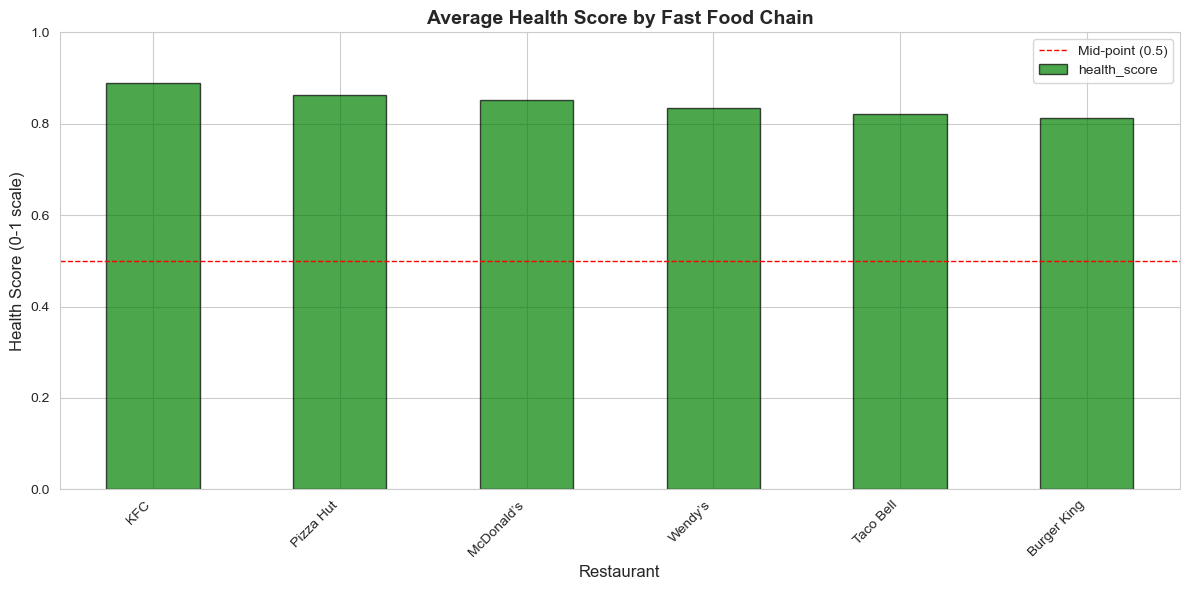


----------------------------------------------------------------------
DETAILED NUTRITIONAL BREAKDOWN BY RESTAURANT
----------------------------------------------------------------------
             Calories  Sodium (mg)  Sugars (g)  Saturated Fat (g)
Company                                                          
Burger King    359.19       540.11       27.32               5.57
KFC            215.23       377.11       23.76               1.52
McDonald’s     284.04       337.39       28.13               4.42
Pizza Hut      264.48       522.99        2.16               4.63
Taco Bell      365.38       670.43        9.56               4.94
Wendy’s        322.50       475.81       26.94               4.38

Healthiest Chain: KFC (Score: 0.889)
Least Healthy Chain: Burger King (Score: 0.812)

BONUS: Top 10 Healthiest Items Overall
    Company                            Item  Calories  Sodium (mg)  Sugars (g)  health_score
 McDonald’s                   Dasani® Water       0.0          0.

In [10]:
# Fast Food Nutrition Analysis

# =============================================================================
# CELL 1: Import Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

# =============================================================================
# CELL 2: Load and Explore Data
# =============================================================================
# Load the dataset
df = pd.read_csv('FastFoodNutritionMenuV2.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nOriginal Column names:")
print(df.columns.tolist())

# =============================================================================
# CELL 3: Clean Column Names and Convert to Numeric
# =============================================================================
print("\n" + "=" * 70)
print("CLEANING DATA")
print("=" * 70)

# Remove line breaks and extra spaces from column names
df.columns = df.columns.str.replace('\n', ' ').str.strip()

print("\nCleaned column names:")
print(df.columns.tolist())

# Convert all numeric columns
for col in df.columns:
    if col not in ['Company', 'Item']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData types after conversion:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

# Drop rows with missing Calories
df = df.dropna(subset=['Calories'])

print(f"\nFinal dataset shape: {df.shape}")
print("\nBasic statistics:")
print(df.describe())

print("\nUnique Restaurants:")
print(df['Company'].unique())

print("\nNumber of items per restaurant:")
print(df['Company'].value_counts())

# Remove line breaks and extra spaces from column names
df.columns = df.columns.str.replace('\n', ' ').str.strip()

# FIX: Remove DOUBLE spaces
df.columns = df.columns.str.replace('  ', ' ')

print("\nCleaned column names:")
print(df.columns.tolist())

# Drop rows with missing values in important columns for regression
df = df.dropna(subset=['Calories', 'Protein (g)', 'Total Fat (g)', 'Carbs (g)', 
                       'Sodium (mg)', 'Sugars (g)', 'Saturated Fat (g)'])
# =============================================================================
# CELL 4: QUESTION 1 - Which chain has highest/lowest average calories?
# =============================================================================
print("\n" + "=" * 70)
print("QUESTION 1: Average Calories by Restaurant")
print("=" * 70)

# Calculate average calories by restaurant
avg_calories = df.groupby('Company')['Calories'].mean().sort_values(ascending=False)
print("\nAverage Calories per Menu Item:\n")
print(avg_calories)

# Visualization
plt.figure(figsize=(12, 6))
avg_calories.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Calories per Menu Item by Fast Food Chain', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant', fontsize=12)
plt.ylabel('Average Calories', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('graph/q1_avg_calories.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nHighest: {avg_calories.index[0]} with {avg_calories.values[0]:.1f} calories")
print(f"Lowest: {avg_calories.index[-1]} with {avg_calories.values[-1]:.1f} calories")

# =============================================================================
# CELL 5: QUESTION 2 - Relationship between calories and sodium/sugar
# =============================================================================
print("\n" + "=" * 70)
print("QUESTION 2: Relationship between Calories and Sodium/Sugar")
print("=" * 70)

# Correlation analysis
correlation_data = df[['Calories', 'Sodium (mg)', 'Sugars (g)']].corr()
print("\nCorrelation Matrix:")
print(correlation_data)

# Visualization 1: Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.3f')
plt.title('Correlation Matrix: Calories, Sodium, and Sugar', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('graph/q2_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Calories vs Sodium
axes[0].scatter(df['Calories'], df['Sodium (mg)'], alpha=0.5, c='blue', edgecolors='black', s=50)
axes[0].set_xlabel('Calories', fontsize=11)
axes[0].set_ylabel('Sodium (mg)', fontsize=11)
axes[0].set_title('Calories vs Sodium Content', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Calories vs Sugar
axes[1].scatter(df['Calories'], df['Sugars (g)'], alpha=0.5, c='red', edgecolors='black', s=50)
axes[1].set_xlabel('Calories', fontsize=11)
axes[1].set_ylabel('Sugar (g)', fontsize=11)
axes[1].set_title('Calories vs Sugar Content', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('graph/q2_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nCorrelation between Calories and Sodium: {df['Calories'].corr(df['Sodium (mg)']):.3f}")
print(f"Correlation between Calories and Sugar: {df['Calories'].corr(df['Sugars (g)']):.3f}")

# =============================================================================
# CELL 6: QUESTION 3 - Predict calories using regression
# =============================================================================
print("\n" + "=" * 70)
print("QUESTION 3: Predicting Calorie Content with Regression")
print("=" * 70)

# Prepare features and target
X = df[['Protein (g)', 'Total Fat (g)', 'Carbs (g)']]
y = df['Calories']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\n" + "-" * 50)
print("MODEL PERFORMANCE")
print("-" * 50)
print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Training RMSE: {rmse_train:.2f} calories")
print(f"Test RMSE: {rmse_test:.2f} calories")
print(f"Test MAE: {mae_test:.2f} calories")

print("\n" + "-" * 50)
print("MODEL COEFFICIENTS")
print("-" * 50)
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nInterpretation:")
print(f"- Each gram of protein adds ~{model.coef_[0]:.2f} calories")
print(f"- Each gram of fat adds ~{model.coef_[1]:.2f} calories")
print(f"- Each gram of carbs adds ~{model.coef_[2]:.2f} calories")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolors='black', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Calories', fontsize=12)
plt.ylabel('Predicted Calories', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted Calories', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('graph/q3_regression_results.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# CELL 7: QUESTION 4 - Which chain offers healthiest options?
# =============================================================================
print("\n" + "=" * 70)
print("QUESTION 4: Healthiest Fast Food Chain")
print("=" * 70)

# Create normalized health scores (0-1 scale, higher = healthier)
df['cal_norm'] = (df['Calories'].max() - df['Calories']) / (df['Calories'].max() - df['Calories'].min())
df['sodium_norm'] = (df['Sodium (mg)'].max() - df['Sodium (mg)']) / (df['Sodium (mg)'].max() - df['Sodium (mg)'].min())
df['sugar_norm'] = (df['Sugars (g)'].max() - df['Sugars (g)']) / (df['Sugars (g)'].max() - df['Sugars (g)'].min())
df['sat_fat_norm'] = (df['Saturated Fat (g)'].max() - df['Saturated Fat (g)']) / (df['Saturated Fat (g)'].max() - df['Saturated Fat (g)'].min())

# Calculate composite health score (equal weights)
df['health_score'] = (df['cal_norm'] + df['sodium_norm'] + df['sugar_norm'] + df['sat_fat_norm']) / 4

# Average health score by restaurant
health_by_restaurant = df.groupby('Company')['health_score'].mean().sort_values(ascending=False)

print("\nHealth Score by Restaurant (higher = healthier):\n")
print(health_by_restaurant)

# Visualization
plt.figure(figsize=(12, 6))
health_by_restaurant.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.title('Average Health Score by Fast Food Chain', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant', fontsize=12)
plt.ylabel('Health Score (0-1 scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1, label='Mid-point (0.5)')
plt.legend()
plt.tight_layout()
plt.savefig('graph/q4_health_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed breakdown by restaurant
print("\n" + "-" * 70)
print("DETAILED NUTRITIONAL BREAKDOWN BY RESTAURANT")
print("-" * 70)
breakdown = df.groupby('Company')[['Calories', 'Sodium (mg)', 'Sugars (g)', 'Saturated Fat (g)']].mean()
print(breakdown.round(2))

print(f"\nHealthiest Chain: {health_by_restaurant.index[0]} (Score: {health_by_restaurant.values[0]:.3f})")
print(f"Least Healthy Chain: {health_by_restaurant.index[-1]} (Score: {health_by_restaurant.values[-1]:.3f})")

# =============================================================================
# CELL 8: Additional Analysis - Healthiest Items
# =============================================================================
print("\n" + "=" * 70)
print("BONUS: Top 10 Healthiest Items Overall")
print("=" * 70)

top_healthy = df.nlargest(10, 'health_score')[['Company', 'Item', 'Calories', 'Sodium (mg)', 'Sugars (g)', 'health_score']]
print(top_healthy.to_string(index=False))

print("\n" + "=" * 70)
print("BONUS: Top 10 Least Healthy Items")
print("=" * 70)

least_healthy = df.nsmallest(10, 'health_score')[['Company', 'Item', 'Calories', 'Sodium (mg)', 'Sugars (g)', 'health_score']]
print(least_healthy.to_string(index=False))

# =============================================================================
# CELL 9: Summary Statistics
# =============================================================================
print("\n" + "=" * 70)
print("FINAL SUMMARY STATISTICS")
print("=" * 70)

summary_stats = {
    'Total Items Analyzed': len(df),
    'Number of Restaurants': df['Company'].nunique(),
    'Average Calories': df['Calories'].mean(),
    'Average Sodium (mg)': df['Sodium (mg)'].mean(),
    'Average Sugar (g)': df['Sugars (g)'].mean(),
    'Regression R² Score': r2_test,
    'Prediction Error (RMSE)': rmse_test
}

for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

print("\n" + "=" * 70)